In [1]:
import os
import sys
sys.path.append(os.path.abspath("../src/"))
sys.path.append(os.path.abspath("../LHAPDF-files/"))
from tools import PDFs
from LO import F123LO
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
from data import *
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
from scipy.optimize import minimize
from scipy.integrate import quad

In [95]:
def F2 (x) : 
    return (1-x)**3
def integradH2(u) : 
    return F2(u)/u**2

def integrandG2 (u, xi): 
    return (u-xi)*F2(u)/u**2

def H2 (x) : 
    return quad(integradH2, x, 1.0)[0]

def G2(x)  : 
    return quad(integrandG2, x, 1.0, args=(x))[0]

def getF2TMCoverF2leading (x, Q=1.3) : 
    M=0.938
    mu =(M/Q)**2
    r=np.sqrt(1+(2.*x*M/Q)**2)
    xi = 2*x/(1+r)
    return 1+ 6*mu*x*xi**2*H2(xi)/(F2(xi)*r) + 12*(mu*x*xi/r)**2*G2(xi)/F2(xi)


##############################################
def getApproxh2of2 (x, par=[3., 0], order=4) : 
    a= par[0]
    b= par[1]
    ret =(1-x)* sc.hyp2f1(2, a+1, a+2, 1-x) /(a+1)
    return ret


def getApproxg2of2(x, par=[3., 0], order =4) : 
    a= par[0]
    b= par[1]
    ret = (1-x)*((1+a*x)*sc.hyp2f1(1, a+1, a+2, 1-x) /(a+1)   -1 )
    return ret

def getApproxF2TMCoF2leading(x, Q, par) : 
    M=0.938
    mu =(M/Q)**2
    r=np.sqrt(1+(2.*x*M/Q)**2)
    xi = 2*x/(1+r)
    return 1+ 6*mu*x*xi**2*getApproxh2of2(xi, par)/r + 12*(mu*x*xi/r)**2*getApproxg2of2(xi, par)
    #########################################

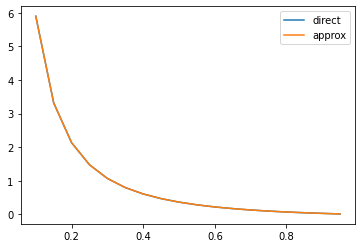

In [94]:
plt.plot(xlist, [H2(x)/F2(x) for x in xlist], label="direct")
plt.plot(xlist, [getApproxh2of2(x) for x in xlist], label="approx")
plt.legend()

In [30]:
def ApproxF2massless(x, xi, Fxi, gamma, order) : 
    kappa =0
    for j in range(1, order+1) : 
        kappa=kappa+((-1)**j/math.factorial(j)) * ((x-xi)/(1-xi))**j
    kappa = 1+gamma*kappa 
    return kappa*Fxi



/tmp/ipykernel_28296/732278245.py:4: RuntimeWarning: overflow encountered in double_scalars
  kappa=kappa+((-1)**j/math.factorial(j)) * ((x-xi)/(1-xi))**j
/tmp/ipykernel_28296/732278245.py:4: RuntimeWarning: invalid value encountered in double_scalars
  kappa=kappa+((-1)**j/math.factorial(j)) * ((x-xi)/(1-xi))**j


(0.08, 1.0)

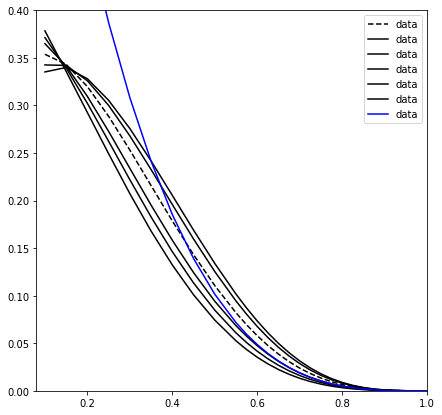

In [74]:
xlist = np.array([
    0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.575, 0.60, 0.625, 
                0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999, 1.0
])
F2data = nCTEQ15_F2massless_NC_Q_2["56_26"]
gamma=2.09



plt.figure(figsize=[7,7])
xi_ind = [0, 5, 10, 15, 20, 25]
for ind in xi_ind : 
    xl = [ (xlist[ind]+0.01*i) for i in range(0,100)]

    y = [ApproxF2massless(x,xlist[ind], F2data[ind], gamma, order=300)  for x in xl]
    print()
    #plt.plot(xl, y, label=str(xlist[ind]))


plt.plot(xlist, F2data, label="data", color="black", linestyle="dashed")
plt.plot(xlist, nCTEQ15_F2massless_NC_Q_1_3["56_26"], label="data", color="black", linestyle="-")
plt.plot(xlist, nCTEQ15_F2massless_NC_Q_1_5["56_26"], label="data", color="black", linestyle="-")
plt.plot(xlist, nCTEQ15_F2massless_NC_Q_3["56_26"], label="data", color="black", linestyle="-")
plt.plot(xlist, nCTEQ15_F2massless_NC_Q_4["56_26"], label="data", color="black", linestyle="-")
plt.plot(xlist, nCTEQ15_F2massless_NC_Q_6["56_26"], label="data", color="black", linestyle="-")
plt.plot(xlist, [F2(x, 0., 3.3) for x in xlist], label="data", color="blue", linestyle="-")
plt.legend()
plt.ylim([0., 0.4])
plt.xlim([0.08, 1.0])
#plt.yscale("log")

(0.08, 1.0)

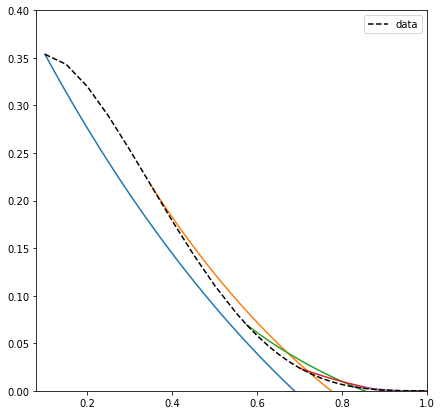

In [38]:
xlist = np.array([
    0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.575, 0.60, 0.625, 
                0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999, 1.0
])
F2data = nCTEQ15_F2massless_NC_Q_2["56_26"]
gamma=2.09



plt.figure(figsize=[7,7])
xi_ind = [0, 5, 10, 15, 20, 25]
for ind in xi_ind : 
    xl = [ (xlist[ind]+0.01*i) for i in range(0,100)]

    y = [ApproxF2massless(x,xlist[ind], F2data[ind], gamma, order=4)  for x in xl]
    print()
    plt.plot(xl, y)



plt.plot(xlist, F2data, label="data", color="black", linestyle="dashed")
plt.legend()
plt.ylim([0.0, 0.4])
plt.xlim([0.08, 1.0])
#plt.yscale("log")

In [13]:

xlist[25]

0.95

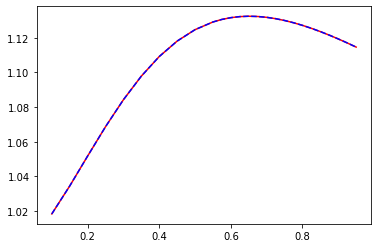

In [96]:
xlist= [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.575, 0.60, 0.625, 
                0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95]

data = np.array([getF2TMCoverF2leading (x, 1.3) for x in xlist])

plt.plot(xlist, data, label="data", color="red")
plt.plot(xlist, [getApproxF2TMCoF2leading(x, 1.3, [3., 0.0]) for x in xlist], label="pred", color="blue", linestyle="dashed")

In [8]:
def getH2oF2(x, a) : 
    return (1-x)*sc.hyp2f1(2, a+1, a+2, (1-x))/(a+1)

def getG2oF2(x, a) : 
    return (1-x)*( (a*x**2+x)*sc.hyp2f1(1, a+1, a+2, (1-x)) - x*(a+1))/(x*(a+1))

def getF2TMCoF2leading_pred(x, Q, a=2.8) : 
    M=0.938
    mu =(M/Q)**2
    r=np.sqrt(1+(2.*x*M/Q)**2)
    xi = 2*x/(1+r)
    return 1+ 6*mu*x*xi**2*getH2oF2(xi, a)/r + 12*(mu*x*xi/r)**2*getG2oF2(xi, a)
    

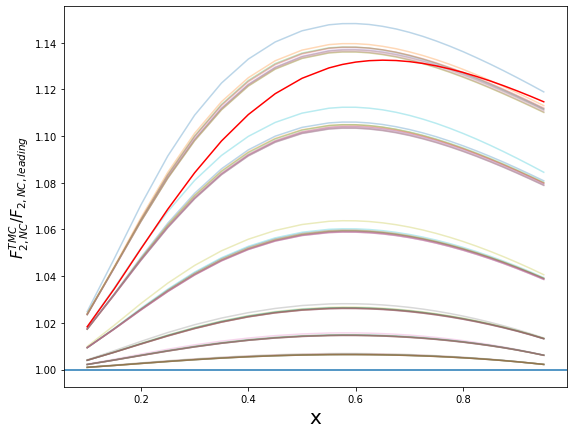

In [33]:
nCTEQ_F2_13 = {1: [1.02482, 1.04732, 1.07048, 1.09144, 1.10893, 1.12268, 1.13296, 1.14028, 1.14507, 1.14764, 1.14813, 1.14816, 1.14778, 1.14698, 1.14586, 1.1444, 1.14268, 1.14069, 1.13849, 1.13611, 1.13353, 1.13083, 1.128, 1.12505, 1.12202, 1.1189],
4: [1.02357, 1.04396, 1.06497, 1.08444, 1.10118, 1.1147, 1.12497, 1.13223, 1.1368, 1.13915, 1.13956, 1.13955, 1.13918, 1.13842, 1.13739, 1.13604, 1.13448, 1.13268, 1.13069, 1.12853, 1.12621, 1.12378, 1.12122, 1.11856, 1.11584, 1.11302],
7: [1.02345, 1.04351, 1.06419, 1.08342, 1.10004, 1.11352, 1.12378, 1.131, 1.1355, 1.13776, 1.13812, 1.13807, 1.13767, 1.13688, 1.13583, 1.13447, 1.13289, 1.13109, 1.1291, 1.12695, 1.12465, 1.12223, 1.1197, 1.11707, 1.11438, 1.1116],
12: [1.02352, 1.04355, 1.06412, 1.08324, 1.09972, 1.11309, 1.12331, 1.13056, 1.13516, 1.13755, 1.13798, 1.138, 1.13765, 1.13693, 1.13592, 1.13461, 1.13308, 1.13131, 1.12935, 1.12723, 1.12495, 1.12256, 1.12004, 1.11743, 1.11474, 1.11197],
40: [1.02359, 1.04336, 1.0636, 1.08242, 1.09872, 1.11201, 1.1222, 1.12951, 1.13417, 1.13662, 1.13709, 1.13715, 1.13683, 1.13614, 1.13516, 1.13388, 1.13237, 1.13063, 1.1287, 1.1266, 1.12435, 1.12197, 1.11948, 1.11689, 1.11422, 1.11148],
56: [1.02361, 1.04329, 1.06343, 1.08218, 1.09846, 1.11176, 1.12198, 1.12927, 1.13391, 1.13631, 1.13676, 1.13679, 1.13646, 1.13575, 1.13475, 1.13346, 1.13194, 1.13018, 1.12825, 1.12614, 1.12389, 1.12151, 1.11902, 1.11643, 1.11377, 1.11103],
131: [1.0238, 1.04339, 1.06332, 1.0819, 1.09808, 1.11135, 1.12157, 1.12884, 1.13344, 1.13579, 1.13621, 1.13621, 1.13585, 1.13512, 1.13411, 1.1328, 1.13126, 1.1295, 1.12755, 1.12544, 1.12318, 1.1208, 1.11831, 1.11572, 1.11307, 1.11034],
184: [1.02394, 1.04356, 1.06341, 1.08189, 1.098, 1.11123, 1.12142, 1.12869, 1.13327, 1.13562, 1.13604, 1.13604, 1.13568, 1.13495, 1.13393, 1.13262, 1.13109, 1.12933, 1.12739, 1.12528, 1.12302, 1.12064, 1.11815, 1.11557, 1.11292, 1.11019],
208: [1.024, 1.04364, 1.06345, 1.08189, 1.09797, 1.11118, 1.12137, 1.12862, 1.1332, 1.13554, 1.13595, 1.13595, 1.13559, 1.13482, 1.13384, 1.13252, 1.13099, 1.12923, 1.12728, 1.12517, 1.12292, 1.12054, 1.11805, 1.11547, 1.11282, 1.11009],}

nCTEQ15_F2_15 = {1: [1.01824, 1.03482, 1.05196, 1.06767, 1.08099, 1.09168, 1.09985, 1.10582, 1.1098, 1.11191, 1.11232, 1.11232, 1.11193, 1.11122, 1.11017, 1.10884, 1.10723, 1.1054, 1.10333, 1.10108, 1.09866, 1.09607, 1.09334, 1.09049, 1.08753, 1.08448],
4: [1.01731, 1.03238, 1.04802, 1.06268, 1.07546, 1.08595, 1.09407, 1.09993, 1.1037, 1.10562, 1.10597, 1.10596, 1.1056, 1.10494, 1.10398, 1.10278, 1.10133, 1.09968, 1.09782, 1.09579, 1.09361, 1.09128, 1.08883, 1.08625, 1.08357, 1.08082],
7: [1.01722, 1.03206, 1.04746, 1.06194, 1.07464, 1.08511, 1.09321, 1.09902, 1.10272, 1.10456, 1.10488, 1.10484, 1.10445, 1.10377, 1.1028, 1.10158, 1.10013, 1.09848, 1.09663, 1.09462, 1.09246, 1.09015, 1.08773, 1.08519, 1.08255, 1.07984],
12: [1.01727, 1.03208, 1.04741, 1.0618, 1.0744, 1.0848, 1.09287, 1.09872, 1.10251, 1.10445, 1.10483, 1.10483, 1.10449, 1.10385, 1.10292, 1.10174, 1.10032, 1.09869, 1.09686, 1.09487, 1.09272, 1.09043, 1.08802, 1.08548, 1.08284, 1.08013],
40: [1.01731, 1.03192, 1.04701, 1.0612, 1.07367, 1.08401, 1.09209, 1.09796, 1.10179, 1.10379, 1.10419, 1.10422, 1.1039, 1.10328, 1.10237, 1.10121, 1.09981, 1.09821, 1.0964, 1.09443, 1.0923, 1.09003, 1.08763, 1.08512, 1.0825, 1.07981],
56: [1.01732, 1.03186, 1.04688, 1.06103, 1.07348, 1.08383, 1.09191, 1.09778, 1.10159, 1.10354, 1.10393, 1.10394, 1.1036, 1.10297, 1.10206, 1.10088, 1.09948, 1.09787, 1.09606, 1.09408, 1.09195, 1.08968, 1.08729, 1.08478, 1.08217, 1.07949],
131: [1.01741, 1.03189, 1.04676, 1.06079, 1.07319, 1.08352, 1.0916, 1.09746, 1.10123, 1.10314, 1.1035, 1.10349, 1.10314, 1.10249, 1.10156, 1.10038, 1.09896, 1.09735, 1.09553, 1.09355, 1.09142, 1.08915, 1.08677, 1.08427, 1.08167, 1.079],
184: [1.01749, 1.03197, 1.04679, 1.06077, 1.07312, 1.08343, 1.0915, 1.09735, 1.10111, 1.10302, 1.10338, 1.10337, 1.10302, 1.10237, 1.10144, 1.10026, 1.09884, 1.09723, 1.09542, 1.09344, 1.09131, 1.08904, 1.08666, 1.08416, 1.08157, 1.0789],
208: [1.01752, 1.03201, 1.04681, 1.06076, 1.07309, 1.08339, 1.09145, 1.0973, 1.10106, 1.10296, 1.10332, 1.10331, 1.10295, 1.1023, 1.10137, 1.10019, 1.09877, 1.09715, 1.09534, 1.09336, 1.09123, 1.08897, 1.08659, 1.08409, 1.08149, 1.07883],
}

nCTEQ15_F2_20 = {
1: [1.00987, 1.01887, 1.02825, 1.03698, 1.04457, 1.05084, 1.0558, 1.05954, 1.0621, 1.06347, 1.06372, 1.06368, 1.06338, 1.06282, 1.06202, 1.06099, 1.05974, 1.05828, 1.05663, 1.0548, 1.0528, 1.05064, 1.04833, 1.04588, 1.0433, 1.0406],
4: [1.00936, 1.01759, 1.02621, 1.03441, 1.04172, 1.04787, 1.05276, 1.05638, 1.05878, 1.06004, 1.06026, 1.06024, 1.05996, 1.05947, 1.05875, 1.05783, 1.05671, 1.05541, 1.05393, 1.05229, 1.05048, 1.04853, 1.04644, 1.04421, 1.04184, 1.03936],
7: [1.00931, 1.01741, 1.02591, 1.03403, 1.04129, 1.04742, 1.05229, 1.05588, 1.05823, 1.05944, 1.05964, 1.0596, 1.05931, 1.05881, 1.05809, 1.05717, 1.05605, 1.05476, 1.05329, 1.05167, 1.04989, 1.04796, 1.04591, 1.04371, 1.04139, 1.03896],
12: [1.00934, 1.01742, 1.02588, 1.03395, 1.04116, 1.04726, 1.05212, 1.05574, 1.05815, 1.05942, 1.05965, 1.05963, 1.05937, 1.05889, 1.05819, 1.05729, 1.05618, 1.0549, 1.05345, 1.05183, 1.05005, 1.04813, 1.04608, 1.04388, 1.04155, 1.03911],
40: [1.00934, 1.01732, 1.02566, 1.03363, 1.04078, 1.04685, 1.05171, 1.05535, 1.05778, 1.05907, 1.05932, 1.05931, 1.05907, 1.0586, 1.05791, 1.05702, 1.05593, 1.05466, 1.05322, 1.05161, 1.04985, 1.04795, 1.04591, 1.04372, 1.04141, 1.03899],
56: [1.00934, 1.01729, 1.02559, 1.03353, 1.04068, 1.04675, 1.05162, 1.05524, 1.05765, 1.05893, 1.05916, 1.05915, 1.05889, 1.05842, 1.05772, 1.05682, 1.05573, 1.05446, 1.05302, 1.05142, 1.04966, 1.04776, 1.04573, 1.04355, 1.04125, 1.03885],
131: [1.00936, 1.01726, 1.02549, 1.03339, 1.04051, 1.04658, 1.05144, 1.05506, 1.05745, 1.0587, 1.05892, 1.05889, 1.05863, 1.05814, 1.05744, 1.05654, 1.05545, 1.05417, 1.05273, 1.05113, 1.04938, 1.04749, 1.04546, 1.0433, 1.04101, 1.03863],
184: [1.00938, 1.01728, 1.02549, 1.03336, 1.04047, 1.04653, 1.05139, 1.055, 1.05739, 1.05864, 1.05886, 1.05883, 1.05857, 1.05808, 1.05738, 1.05648, 1.05539, 1.05412, 1.05268, 1.05108, 1.04932, 1.04743, 1.04542, 1.04325, 1.04097, 1.03859],
208: [1.00938, 1.01728, 1.02549, 1.03335, 1.04045, 1.04651, 1.05137, 1.05498, 1.05736, 1.0586, 1.05883, 1.0588, 1.05853, 1.05804, 1.05734, 1.05644, 1.05535, 1.05408, 1.05263, 1.05104, 1.04928, 1.0474, 1.04538, 1.04322, 1.04093, 1.03855],
}


nCTEQ15_F2_30 = {
1: [1.00419, 1.00802, 1.01204, 1.01583, 1.01918, 1.02203, 1.02435, 1.02615, 1.0274, 1.02807, 1.02818, 1.02815, 1.02798, 1.02766, 1.0272, 1.0266, 1.02587, 1.025, 1.024, 1.02287, 1.02162, 1.02023, 1.01874, 1.01712, 1.01538, 1.01352],
4: [1.00397, 1.00749, 1.01121, 1.01479, 1.01803, 1.02082, 1.02309, 1.02482, 1.02599, 1.02662, 1.02673, 1.02671, 1.02656, 1.02628, 1.02587, 1.02534, 1.02469, 1.02391, 1.02301, 1.02199, 1.02085, 1.01958, 1.01821, 1.01671, 1.01508, 1.01332],
7: [1.00394, 1.00742, 1.01109, 1.01464, 1.01786, 1.02064, 1.0229, 1.0246, 1.02575, 1.02635, 1.02646, 1.02643, 1.02627, 1.02599, 1.02558, 1.02505, 1.02441, 1.02364, 1.02275, 1.02175, 1.02062, 1.01938, 1.01803, 1.01657, 1.01497, 1.01323],
12: [1.00395, 1.00742, 1.01107, 1.0146, 1.01781, 1.02057, 1.02283, 1.02455, 1.02573, 1.02636, 1.02647, 1.02646, 1.02631, 1.02604, 1.02564, 1.02512, 1.02447, 1.02371, 1.02282, 1.02182, 1.0207, 1.01945, 1.0181, 1.01663, 1.01502, 1.01328],
40: [1.00395, 1.00737, 1.01098, 1.01447, 1.01764, 1.0204, 1.02266, 1.02439, 1.02557, 1.02622, 1.02634, 1.02633, 1.02619, 1.02592, 1.02553, 1.02501, 1.02437, 1.02361, 1.02273, 1.02174, 1.02063, 1.01939, 1.01805, 1.01659, 1.015, 1.01327],
56: [1.00395, 1.00735, 1.01094, 1.01443, 1.01761, 1.02036, 1.02262, 1.02434, 1.02552, 1.02615, 1.02627, 1.02625, 1.02611, 1.02584, 1.02544, 1.02492, 1.02429, 1.02353, 1.02265, 1.02166, 1.02055, 1.01932, 1.01798, 1.01653, 1.01495, 1.01323],
131: [1.00394, 1.00733, 1.0109, 1.01436, 1.01753, 1.02029, 1.02255, 1.02426, 1.02543, 1.02605, 1.02616, 1.02614, 1.02599, 1.02572, 1.02532, 1.0248, 1.02416, 1.02341, 1.02253, 1.02154, 1.02044, 1.01922, 1.01789, 1.01645, 1.01488, 1.01317],
184: [1.00394, 1.00733, 1.01089, 1.01435, 1.01752, 1.02027, 1.02253, 1.02424, 1.02541, 1.02603, 1.02614, 1.02612, 1.02597, 1.0257, 1.0253, 1.02478, 1.02414, 1.02338, 1.02251, 1.02152, 1.02042, 1.0192, 1.01787, 1.01643, 1.01486, 1.01316],
208: [1.00394, 1.00732, 1.01089, 1.01434, 1.01751, 1.02026, 1.02252, 1.02423, 1.02539, 1.02601, 1.02612, 1.0261, 1.02595, 1.02568, 1.02528, 1.02476, 1.02412, 1.02337, 1.02249, 1.02151, 1.0204, 1.01918, 1.01786, 1.01642, 1.01485, 1.01315],
}

nCTEQ15_F2_40 = {
    1: [1.00229, 1.00439, 1.00659, 1.00868, 1.01055, 1.01215, 1.01347, 1.01451, 1.01523, 1.01563, 1.01569, 1.01567, 1.01556, 1.01537, 1.01509, 1.01472, 1.01426, 1.01371, 1.01308, 1.01236, 1.01155, 1.01065, 1.00967, 1.00859, 1.00743, 1.00617],
4: [1.00217, 1.0041, 1.00615, 1.00813, 1.00994, 1.01151, 1.0128, 1.01379, 1.01447, 1.01484, 1.0149, 1.01489, 1.0148, 1.01463, 1.01438, 1.01405, 1.01364, 1.01315, 1.01258, 1.01193, 1.01118, 1.01036, 1.00945, 1.00844, 1.00733, 1.00613],
7: [1.00215, 1.00406, 1.00608, 1.00805, 1.00985, 1.01141, 1.01269, 1.01367, 1.01434, 1.01469, 1.01475, 1.01474, 1.01464, 1.01447, 1.01422, 1.0139, 1.01349, 1.01301, 1.01244, 1.0118, 1.01107, 1.01026, 1.00937, 1.00838, 1.00728, 1.0061],
12: [1.00216, 1.00406, 1.00608, 1.00803, 1.00982, 1.01137, 1.01266, 1.01364, 1.01433, 1.0147, 1.01477, 1.01476, 1.01467, 1.0145, 1.01426, 1.01393, 1.01353, 1.01305, 1.01249, 1.01184, 1.01111, 1.0103, 1.0094, 1.00841, 1.00731, 1.00613],
40: [1.00215, 1.00403, 1.00602, 1.00796, 1.00973, 1.01128, 1.01256, 1.01356, 1.01424, 1.01462, 1.01469, 1.01469, 1.0146, 1.01444, 1.0142, 1.01388, 1.01348, 1.013, 1.01244, 1.0118, 1.01108, 1.01027, 1.00938, 1.00839, 1.00731, 1.00612],
56: [1.00215, 1.00402, 1.006, 1.00794, 1.00971, 1.01126, 1.01254, 1.01353, 1.01421, 1.01458, 1.01465, 1.01464, 1.01456, 1.01439, 1.01415, 1.01383, 1.01343, 1.01295, 1.0124, 1.01176, 1.01104, 1.01024, 1.00935, 1.00837, 1.00728, 1.00611],
131: [1.00214, 1.00401, 1.00598, 1.0079, 1.00967, 1.01122, 1.0125, 1.01349, 1.01416, 1.01453, 1.0146, 1.01458, 1.01449, 1.01433, 1.01408, 1.01376, 1.01336, 1.01289, 1.01233, 1.0117, 1.01098, 1.01019, 1.00931, 1.00833, 1.00725, 1.00609],
184: [1.00214, 1.004, 1.00597, 1.00789, 1.00966, 1.01121, 1.01249, 1.01348, 1.01415, 1.01452, 1.01458, 1.01457, 1.01448, 1.01432, 1.01407, 1.01375, 1.01335, 1.01288, 1.01232, 1.01169, 1.01097, 1.01018, 1.0093, 1.00832, 1.00725, 1.00608],
208: [1.00214, 1.004, 1.00597, 1.00789, 1.00966, 1.01121, 1.01249, 1.01347, 1.01415, 1.01451, 1.01458, 1.01456, 1.01447, 1.01431, 1.01406, 1.01374, 1.01334, 1.01287, 1.01231, 1.01168, 1.01096, 1.01017, 1.00929, 1.00832, 1.00725, 1.00608],
}

nCTEQ15_F2_60 = {
    1: [1.00098, 1.00188, 1.00283, 1.00374, 1.00456, 1.00526, 1.00585, 1.00631, 1.00664, 1.00682, 1.00685, 1.00684, 1.00679, 1.0067, 1.00657, 1.0064, 1.00618, 1.00592, 1.00561, 1.00526, 1.00486, 1.00442, 1.00393, 1.00339, 1.0028, 1.00218],
4: [1.00093, 1.00176, 1.00265, 1.00351, 1.0043, 1.00499, 1.00556, 1.00601, 1.00632, 1.00649, 1.00652, 1.00651, 1.00647, 1.00639, 1.00628, 1.00612, 1.00593, 1.00569, 1.00541, 1.00509, 1.00473, 1.00432, 1.00386, 1.00335, 1.00278, 1.00217],
7: [1.00092, 1.00175, 1.00262, 1.00348, 1.00426, 1.00495, 1.00552, 1.00596, 1.00626, 1.00642, 1.00645, 1.00645, 1.0064, 1.00633, 1.00621, 1.00606, 1.00586, 1.00563, 1.00536, 1.00504, 1.00468, 1.00428, 1.00383, 1.00333, 1.00277, 1.00217],
12: [1.00092, 1.00175, 1.00262, 1.00347, 1.00425, 1.00493, 1.0055, 1.00595, 1.00626, 1.00643, 1.00646, 1.00646, 1.00642, 1.00634, 1.00622, 1.00607, 1.00588, 1.00565, 1.00538, 1.00506, 1.0047, 1.0043, 1.00384, 1.00334, 1.00278, 1.00218],
40: [1.00092, 1.00173, 1.0026, 1.00344, 1.00421, 1.0049, 1.00547, 1.00591, 1.00622, 1.0064, 1.00643, 1.00643, 1.00639, 1.00631, 1.0062, 1.00605, 1.00586, 1.00563, 1.00536, 1.00504, 1.00469, 1.00429, 1.00384, 1.00333, 1.00278, 1.00218],
56: [1.00092, 1.00173, 1.00259, 1.00343, 1.0042, 1.00489, 1.00546, 1.0059, 1.00621, 1.00638, 1.00641, 1.00641, 1.00637, 1.00629, 1.00618, 1.00603, 1.00584, 1.00561, 1.00534, 1.00503, 1.00467, 1.00427, 1.00383, 1.00333, 1.00277, 1.00217],
131: [1.00091, 1.00172, 1.00257, 1.00341, 1.00419, 1.00487, 1.00544, 1.00588, 1.00619, 1.00636, 1.00639, 1.00638, 1.00634, 1.00626, 1.00615, 1.006, 1.00581, 1.00558, 1.00531, 1.005, 1.00465, 1.00425, 1.00381, 1.00331, 1.00276, 1.00217],
184: [1.00091, 1.00172, 1.00257, 1.00341, 1.00419, 1.00487, 1.00544, 1.00588, 1.00618, 1.00635, 1.00638, 1.00638, 1.00634, 1.00626, 1.00615, 1.00599, 1.0058, 1.00558, 1.00531, 1.005, 1.00465, 1.00425, 1.00381, 1.00331, 1.00276, 1.00217],
208: [1.00091, 1.00171, 1.00257, 1.00341, 1.00418, 1.00487, 1.00544, 1.00588, 1.00618, 1.00635, 1.00638, 1.00637, 1.00633, 1.00626, 1.00614, 1.00599, 1.0058, 1.00557, 1.0053, 1.00499, 1.00464, 1.00425, 1.0038, 1.00331, 1.00276, 1.00217],
}

group= [nCTEQ_F2_13, nCTEQ15_F2_15, nCTEQ15_F2_20, nCTEQ15_F2_30, nCTEQ15_F2_40, nCTEQ15_F2_60]
Q2l = [1.3, 1.5, 2., 3., 4., 6.]

plt.figure(figsize=[9, 7])
for i, g in zip(range(len(group)), group) : 
    A=list(g.keys())
    for a in A : 
        plt.plot(xlist, g[a],alpha=0.3, linestyle="-")
plt.xlabel("x", fontsize=20)
plt.ylabel(r"$F_{2, NC}^{TMC}/F_{2, NC, leading}$", fontsize=15)
plt.axhline(1.0)
plt.plot(xlist, [getF2TMCoF2leading_pred(x, 1.3, 3.) for x in xlist], label="t", color="red")
plt.savefig("approx.pdf", bbox_inches="tight")

(0.6, 0.95)

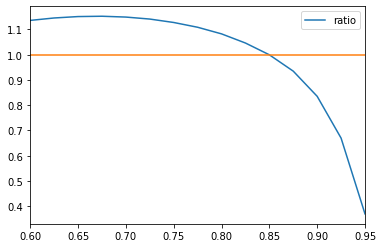

In [19]:
F2ncteq= np.array([0.335386, 0.335737, 0.324465, 0.304796, 0.278578, 0.247426, 0.213049, 0.177319, 0.142094, 0.109093, 0.0938689, 0.0796785, 0.0666369, 0.0548202, 0.0442676, 0.0349979, 0.0270065, 0.0202412, 0.0146625, 0.0101736, 0.00667582, 0.00407895, 0.00224817, 0.00105157, 0.000366054, 6.23131e-05])
model = np.array([(1-x)**2.9 for x in xlist])
plt.plot(xlist, F2ncteq/model, label="ratio")
plt.plot(xlist, model/model)
plt.legend()
plt.xlim(0.6, 0.95)

(0.0, 0.1)

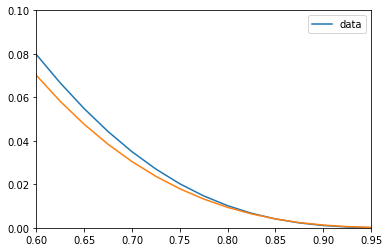

In [24]:
F2ncteq= np.array([0.335386, 0.335737, 0.324465, 0.304796, 0.278578, 0.247426, 0.213049, 0.177319, 0.142094, 0.109093, 0.0938689, 0.0796785, 0.0666369, 0.0548202, 0.0442676, 0.0349979, 0.0270065, 0.0202412, 0.0146625, 0.0101736, 0.00667582, 0.00407895, 0.00224817, 0.00105157, 0.000366054, 6.23131e-05])
model = np.array([(1-x)**2.9 for x in xlist])
plt.plot(xlist, F2ncteq, label="data")
plt.plot(xlist, model)
plt.legend()
plt.xlim(0.6, 0.95)
plt.ylim(0.0, 0.1)

In [7]:
import math
import scipy.special as sc 
sc.hyp2f1(1, 49, 9, 0)

1.0

In [35]:
def getAverage(dt) : 
    arr=[]
    for k, i in dt.items(): 
        arr.append(i)

    arr= np.array(arr)
    vec= []
    Ncol= arr.shape[1]
    for i in range(Ncol) : 
        vec.append(np.average(arr[:,i]))
    return np.array(vec)

(0.0, 0.03)

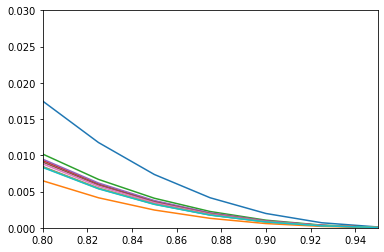

In [65]:
F2massless_ncteq15 = {
1: [0.357362, 0.362627, 0.361107, 0.352173, 0.334454, 0.307822, 0.273438, 0.233818, 0.192443, 0.152205, 0.133123, 0.114981, 0.097951, 0.0821711, 0.0677286, 0.0547184, 0.0431815, 0.0331367, 0.0245856, 0.0174841, 0.0117635, 0.00735928, 0.00414571, 0.00197621, 0.000695807, 0.000117481],
10: [0.301731, 0.295747, 0.276644, 0.250479, 0.221157, 0.190944, 0.161282, 0.132882, 0.105733, 0.0803751, 0.0686925, 0.0578353, 0.0479069, 0.0389742, 0.0310712, 0.024207, 0.0183727, 0.0135118, 0.0095828, 0.00649067, 0.00414263, 0.00245423, 0.0013054, 0.000584676, 0.000192371, 2.96473e-05],
4: [0.335386, 0.335739, 0.324469, 0.304802, 0.278585, 0.247433, 0.213056, 0.177326, 0.1421, 0.109098, 0.0938738, 0.0796828, 0.0666406, 0.0548234, 0.0442702, 0.035, 0.0270081, 0.0202424, 0.0146634, 0.0101742, 0.0066762, 0.00407917, 0.00224827, 0.00105159, 0.000366047, 6.23023e-05],
7: [0.333179, 0.333779, 0.321389, 0.300207, 0.27273, 0.240882, 0.206424, 0.171111, 0.136565, 0.10435, 0.0895397, 0.0757708, 0.0631532, 0.0517577, 0.0416197, 0.0327512, 0.0251433, 0.0187368, 0.0134883, 0.00929457, 0.00605279, 0.00366905, 0.00200558, 0.000930093, 0.000321186, 5.43423e-05],
12: [0.338379, 0.340048, 0.327999, 0.306588, 0.278433, 0.245627, 0.210081, 0.173711, 0.138324, 0.105533, 0.0905165, 0.0765829, 0.0638336, 0.0523305, 0.0421031, 0.0331581, 0.0254831, 0.0190161, 0.0137125, 0.00946852, 0.00618155, 0.00375828, 0.00206182, 0.000960666, 0.000333932, 5.72061e-05],
40: [0.338218, 0.342189, 0.330246, 0.307812, 0.278306, 0.244303, 0.207928, 0.171145, 0.135709, 0.103136, 0.0882963, 0.0745686, 0.0620422, 0.0507694, 0.0407723, 0.032049, 0.0245826, 0.018306, 0.013172, 0.00907451, 0.00590999, 0.00358467, 0.00196217, 0.000912545, 0.000317043, 5.45326e-05],
56: [0.335174, 0.339878, 0.328009, 0.305358, 0.275655, 0.241627, 0.205428, 0.168968, 0.133893, 0.10166, 0.0869796, 0.0734028, 0.0610198, 0.0498827, 0.0400136, 0.0314102, 0.0240554, 0.0178814, 0.0128404, 0.00882544, 0.00573234, 0.0034666, 0.00189126, 0.000876278, 0.000303188, 5.18931e-05],
131: [0.326911, 0.334427, 0.324011, 0.301737, 0.272001, 0.237969, 0.201964, 0.165891, 0.131278, 0.0995041, 0.0850448, 0.0716831, 0.0595073, 0.0485687, 0.038889, 0.0304636, 0.0232751, 0.0172539, 0.0123513, 0.00845889, 0.00547149, 0.00329362, 0.00178761, 0.000823393, 0.000283047, 4.80791e-05],
184: [0.322679, 0.331817, 0.322713, 0.301042, 0.27149, 0.237463, 0.201438, 0.165368, 0.130787, 0.0990674, 0.0846412, 0.071316, 0.0591792, 0.0482802, 0.0386403, 0.0302536, 0.0231021, 0.0171153, 0.0122439, 0.00837908, 0.00541531, 0.00325678, 0.00176581, 0.000812431, 0.000278946, 4.73258e-05],
208: [0.320613, 0.330362, 0.321832, 0.30044, 0.270987, 0.236996, 0.201001, 0.164978, 0.130451, 0.0987851, 0.0843862, 0.0710876, 0.0589767, 0.0481033, 0.0384879, 0.030125, 0.0229957, 0.0170297, 0.0121771, 0.008329, 0.00537972, 0.00323316, 0.00175166, 0.000805207, 0.000276183, 4.67955e-05],
}
ave = getAverage(F2massless_ncteq15)

for key, item in F2massless_ncteq15.items() : 
    plt.plot(xlist, np.array(item))
plt.xlim(0.8, 0.95)
plt.ylim(0.0, 0.03)


#plt.plot(xlist, np.array([(1-x)**2.8 for x in xlist])/ave )


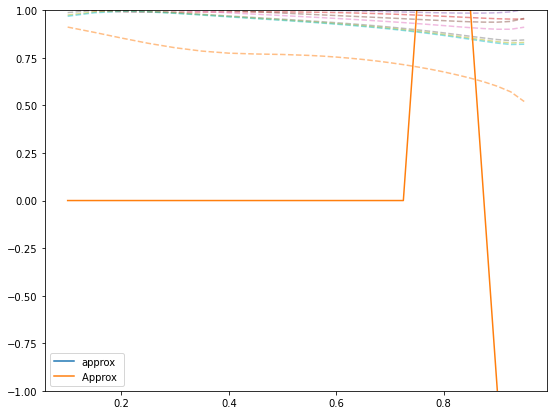

In [54]:

def getF2fromMyApprox (x) : 
    xi = 0.7
    Fxi= 0.0314102
    a=2.31
    return Fxi - a*Fxi*(x-xi)/(1-xi)+ a*Fxi*(x-xi)**2/(2*(1-xi)**2)

    
plt.figure(figsize=[9,7])
for key, item in F2massless_ncteq15.items() : 
    plt.plot(xlist, np.array(item)/ave, linestyle="dashed", alpha =0.5)

plt.plot(xlist, np.array([(1-x)**2.8 for x in xlist])/ave, label = "approx")
plt.plot(xlist, np.array([getF2fromMyApprox(x) for x in xlist])//ave, label="Approx ")
plt.ylim(-1, 1)
plt.legend()

In [43]:
for x, y in zip(xlist, F2massless_ncteq15[56]): 
    print(x, y)

0.1 0.335174
0.15 0.339878
0.2 0.328009
0.25 0.305358
0.3 0.275655
0.35 0.241627
0.4 0.205428
0.45 0.168968
0.5 0.133893
0.55 0.10166
0.575 0.0869796
0.6 0.0734028
0.625 0.0610198
0.65 0.0498827
0.675 0.0400136
0.7 0.0314102
0.725 0.0240554
0.75 0.0178814
0.775 0.0128404
0.8 0.00882544
0.825 0.00573234
0.85 0.0034666
0.875 0.00189126
0.9 0.000876278
0.925 0.000303188
0.95 5.18931e-05


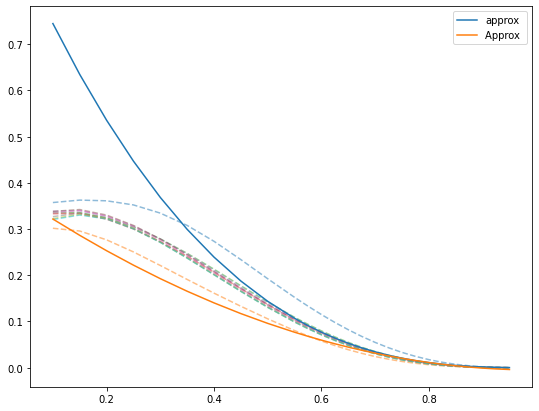

In [61]:

def getF2fromMyApprox (x) : 
    xi = 0.7
    Fxi= 0.0314102
    a=2.31
    return Fxi - a*Fxi*(x-xi)/(1-xi)+ a*Fxi*(x-xi)**2/(2*(1-xi)**2)

    
plt.figure(figsize=[9,7])
for key, item in F2massless_ncteq15.items() : 
    plt.plot(xlist, np.array(item), linestyle="dashed", alpha =0.5)

plt.plot(xlist, np.array([(1-x)**2.8 for x in xlist]), label = "approx")
plt.plot(xlist, np.array([getF2fromMyApprox(x) for x in xlist]), label="Approx ")
#plt.ylim(0.0, 0.1)
#plt.xlim(0.6, 0.95)
plt.legend()